In [57]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [69]:
N=100
x_start,x_end=-1,1
y_start,y_end=-1.5,1.5
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)

u_inf=1
u_freestream=numpy.ones_like(X)
v_freestream=numpy.zeros_like(X)

In [70]:
class Source:
    def __init__(self,strength,x,y):
        self.strength=strength
        self.x,self.y=x,y
    def velocity(self,X,Y):
        self.u=self.strength/(2*math.pi)*(X-self.x)\
        /((X-self.x)**2+(Y-self.y)**2)
        self.v=self.strength/(2*math.pi)*(Y-self.y)\
        /((X-self.x)**2+(Y-self.y)**2)
    def stream_function(self,X,Y):
        self.psi=self.strength/(2*math.pi)\
        *numpy.arctan2((Y-self.y),(X-self.x))

In [71]:
N_sources=11
strength=5
strength_source=strength/N_sources
x_source=numpy.zeros(N_sources,dtype=float)
y_source=numpy.linspace(-1,1,N_sources)

# create lots of sources
sources=numpy.empty(N_sources,dtype=object)
for i in range(N_sources):
    sources[i]=Source(strength_source,x_source[i],y_source[i])
    sources[i].velocity(X,Y)
u=u_freestream.copy()
v=v_freestream.copy()
for source in sources:
    u+=source.u
    v+=source.v

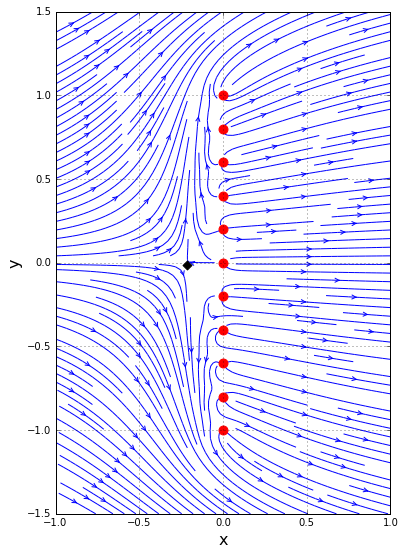

In [81]:
# plot the source
size=6
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid()
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')

# plot the sources
pyplot.scatter(x_source,y_source,color='r',s=80,marker='o')
#plot the stagnation point
magnitude=numpy.sqrt(u**2+v**2)
y_s,x_s=numpy.unravel_index(magnitude.argmin(),magnitude.shape)
pyplot.scatter(x[x_s],y[y_s],color='black',s=40,marker='D')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end);

